<a href="https://colab.research.google.com/github/parkmina365/machine_learning_guide/blob/main/CH5_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀(Regression)
- 회귀: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
- 머신러닝 관점에서 독립변수는 features, 종속변수는 target
- 머신러닝 회귀 예측의 핵심은 주어진 피쳐와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 머신러닝의 지도학습 중 두가지 유형 중 하나. 예측값: Regression(연속), Classification(이산)
- 회귀의 종류
  - 독립변수의 갯수: 단일 회귀, 다중 회귀
  - 회귀계수의 결합: 선형 회귀, 비선형 회귀
- 선형회귀(Linear Regression): 실제값과 예측값의 차이(RSS: Residual Sum of Squares)를 최소화하는 직선형 회귀선을 최적화 하는 방식. 규제(Regulation) 방법에 따라 Lasso, Ridge, ElasticNet 등으로 추가로 분류 가능
  - 규제(Regulation): 선형회귀의 과적합 문제를 해결하기 위해 회귀계수에 패널티 값을 적용
- 회귀의 종류: Linear Regression, Lasso, Ridge, ElasticNet, Logistic Regression

# 2. Simple Linear Regression을 통한 회귀이해
- 단순선형회귀: 독립변수 1개, 종속변수 1개인 선형회귀
- 잔차(오류값) 합이 최소가 되는 모델을 선정(회귀 계수를 결정)
- 잔차의 합을 구할시 단순히 더하면 그 값이 줄어듦(+,-가 상쇄)
  - MAE(Mean Absolute Error): 잔차에 절댓값을 취해서 더함
  - RSS(Residual Sum of Squares): 잔차의 제곱을 취해서 더함
  - 잔차(Residual): 실제값과 회귀모델의 차이에 따른 오류값
- RSS를 최소화 하는 회귀계수를 학습을 통해 찾는것이 머신러닝 기반 회귀의 핵심임. X, Y가 중심이 아닌 W(가중치=회귀계수)가 중심
- Cost function: (비용함수 = 손실함수 = loss function) RSS는 비용(Cost)의 개념. 회귀계수(w0, w1..)로 구성되는 함수
- 머신러닝 회귀 알고리즘은 비용함수가 반환하는 값(=오류값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류값을 구하는 것

# 3. 비용 최소화 : 경사 하강법(Gradient Descent)
- Cost function이 최소가 되는 W 파라미터가 중심
- 경사하강법: = 점진적인 하강. 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하며 비용함수(오류값)가 최소가 되는 W파라미터를 구하는 방식
- W가 많을시 고차원 방정식으로도 도출이 어렵다는 문제를 해결
- 데이터를 기반으로 알고리즘이 스스로 학습한다는 머신러닝의 개념을 가능하게 만들어준 핵심 기법. 딥러닝의 기반인 신경망에서도 경사하강법을 통한 학습을 수행함

# 4. Linear Regression을 이용한 보스턴 주택 가격 예측
## 1. LinearRegression
- RSS를 최소화해 OLS(Ordinary Least Squares) 추정방식으로 예측 모델을 구현한 클래스
- OLS기반의 회귀계수 계산은 입력피쳐의 독립성이 많은 영향을 받음. 피쳐간의 상관관계가 높은 경우 분산이 커져 오류에 민감해짐(=다중공선성 = multi-collinearity)
  - 상관관계가 높은 피쳐가 많은 경우, 다중공선성을 줄이기 위해 독립적인 중요한 피쳐만 남기고 제거하거나 규제를 적용함
  - 많은 피쳐가 다중공선성 문제를 가지고 있는 경우, PCA를 통해 차원축소를 수행하기도 함
- LinearRegression.fit(X,y)
  - coef_: 회귀 계수
  - intercept_: y절편값

## 2. 회귀평가 지표
- 실제값과 회귀예측값의 차이(error)를 기반으로 한 지표로 함. 단순히 더할시 +,-가 상쇄되어 실제보다 오류가 줄어듦
- MAE(Mean Absolute Error): error를 절대값으로 변환해 평균함
  - sklearn.metrics.mean_absolute_error
  - (cross_val_score, GridSearchCV 등)scoring 함수 적용값: 'neg_mean_absolute_error'
- MSE(Mean Squared Error): error를 제곱하여 평균함
  - sklearn.metrics.mean_squared_error
  - scoring 함수 적용값: 'neg_mean_squared_error'
- RMSE(Root Squared Error): np.sqrt(MSE)
- MSLE(Mean Squared Log Error): MSE에 log를 적용
- RMSLE(Root Mean Squared Log Error): np.sqrt(RSLE)
- R^2(R-squared): 분산기반으로 예측 성능을 평가함. 실제값의 분산/예측값의 분산. 1에 가까울수록 예측 정확도가 높음
  - sklearn.metrics.r2_score
  - scoring 함수 적용값: 'r2'

- scoring함수 적용시 neg를 붙이는 이유: scoring은 값이 클수록 좋은 평가결과로 인식. MSE, MAE는 작을수록 error가 적다는 의미이며 좋은 지표이기에 -1을 곱해 음수값으로 변환함

## 3. LinearRegression을 이용한 보스턴 주택 가격 회귀 구현

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
display(bostonDF.shape, bostonDF.head(), bostonDF.info())
### null 없고 features, target 모두 float인 데이터셋 -> Regression 실행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


(506, 14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


None

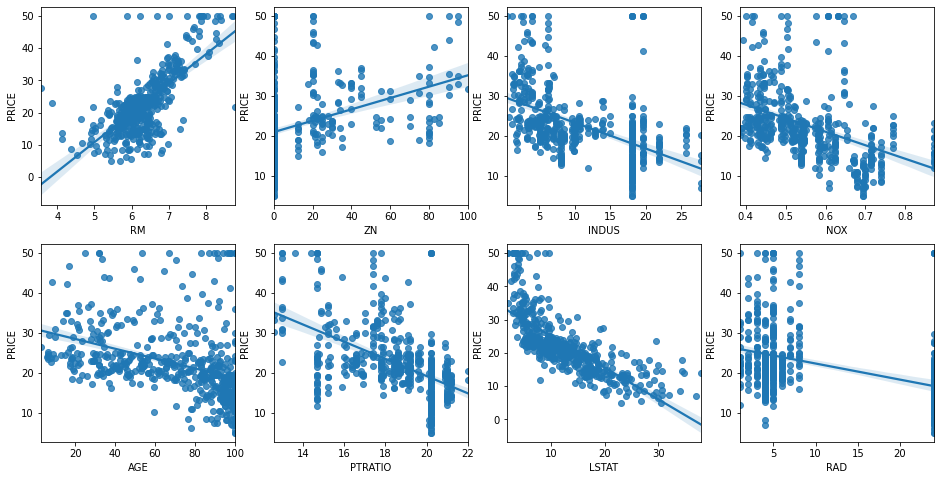

In [ ]:
# 특정 feature가 Regression에 미치는 영향을 시각화로 파악
# 2X4의 subplot만들기. axs는 4X2의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
bostonDF.columns
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

### RM(방개수, +), LSTAT(하위계층비율, -)의 PRICE에 대한 영향도가 가장 두드러지게 보임

In [ ]:
# 회귀모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# X, y 분리
X_data = bostonDF.iloc[:,:-1]
y_target = bostonDF.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형회귀모델(OLS)로 학습,예측,평가
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(f'MSE:{mean_squared_error(y_test, pred):.3f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, pred)):.3f}')
print(f'R-squared:{r2_score(y_test, pred):.3f}')

# 선형회귀모델의 회귀계수, 절편
print(f'coef:{np.round(lr.coef_,1)}')
print(f'intercept:{lr.intercept_:.3f}')

# 피쳐별 회귀계수 보기
pd.Series(np.round(lr.coef_,1), index=X_data.columns).sort_values(ascending=False)

MSE:17.297
RMSE:4.159
R-squared:0.757
coef:[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
intercept:40.996


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
# CV(교차검증)
# folds=5인 세트로 CV실시. MSE, RMSE로 평가

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# X, y 분리
X_data = bostonDF.iloc[:,:-1]
y_target = bostonDF.iloc[:,-1]

# 선형회귀모델 만들기
lr = LinearRegression()

# CV 실시
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 Folds의 개별 Negative MSE Scores : {np.round(neg_mse_scores,3)}')
print(f'5 Folds의 개별 RMSE scores : {np.round(rmse_scores,3)}')
print(f'5 Folds의 평균 RMSE : {avg_rmse:.3f}')

5 Folds의 개별 Negative MSE Scores : [-12.46  -26.049 -33.074 -80.762 -33.314]
5 Folds의 개별 RMSE scores : [3.53  5.104 5.751 8.987 5.772]
5 Folds의 평균 RMSE : 5.829


# 5. 다항회귀와 과(대)적합/과소적합
## 1. 다항회귀 이해
- 독립변수의 단항식이 아닌 2차 이상의 다항식으로 표현되는 것을 다항(Polynomial)회귀라고 함
- 다항회귀는 비선형회귀가 아닌 선형회귀임. 회귀계수가 선형/비선형인지에 따른 기준이며 독립변수의 선형/비선형 여부와는 부관함
- sklearn은 다항회귀를 위한 클래스가 없음. X를 다항식으로 변환하여 LinearRegression을 적용해야 다항회귀가 만들어짐

In [ ]:
# X(1차 단항식)를 2차 다항식으로 변환하기

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
poly = PolynomialFeatures(degree=2)  # 2차 다항식 변환 객체
X2 = poly.fit_transform(X)
print(f'1차 단항식 계수 feature:\n{X}')
print(f'2차 다항식 계수 feature:\n{X2}')

### 1차 단항식: [x1,x2] = [1,0] -> 2차 다항식: [1, x1, x2, x1^2, x1*x2, x2^2] = [1,0,1,0,0,1]

1차 단항식 계수 feature:
[[0 1]
 [2 3]]
2차 다항식 계수 feature:
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
# 3차 다항 회귀함수식을 임의로 설정하고 회귀계수 예측하기 
# y = 1 + 2*x1 + 3*x1^2 + 4*x2^3

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
print(f'1차 단항식 계수 feature:\n{X}')
print(f'3차 다항식 결정값:\n{y}')


# X(1차 단항식)를 3차 다항식으로 변환
# 1차 단항식: [x1,x2] -> 3차 다항식: [1, x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3]
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(X)
print(f'3차 다항식 계수 feature:\n{X3}\n')


# LinearRegression에 X3과 3차 다항식 결정값으로 학습후 회귀계수 확인
model = LinearRegression()
model.fit(X3, y)
print(f'Polynomial coef : {np.round(model.coef_,3)}')
print(f'Polynomial intercept : {model.intercept_:.3f}')
print(f'Polynomial Shape : {model.coef_.shape}')


### 실제 3차 다항식의 계수값인 [1,2,0,3,0,0,0,0,0,4]와 Polynomial coef가 근사하고 있음

1차 단항식 계수 feature:
[[0 1]
 [2 3]]
3차 다항식 결정값:
[  5 125]
3차 다항식 계수 feature:
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]

Polynomial coef : [0.    0.18  0.18  0.36  0.541 0.721 0.721 1.081 1.622 2.342]
Polynomial intercept : 1.757
Polynomial Shape : (10,)


In [ ]:
# Pipeline 객체 이용하여 다항회귀 구현
# 피쳐변환 -> 회귀적용과 달리 한번에 구현 가능

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
    
# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('Poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
model.fit(X,y)
coef = np.round(model.named_steps['linear'].coef_, 3)  # pipeline().named_steps['객체명']: pipeline을 구성하는 세부 객체에 접근
print(f'Polynomial coef : {coef}')

Polynomial coef : [0.    0.18  0.18  0.36  0.541 0.721 0.721 1.081 1.622 2.342]


## 2. 다항 회귀를 이용한 과소적합 및 과적합 이해
- 과적합(Overfitting): 다항회귀의 차수(degree)를 높일수록 train 데이터에만 과다하게 적합되어 test 데이터 환경에서는 예측 정확도가 떨어짐

In [ ]:
# 과적합 예시: 노이즈 있는 cos그래프를 예측하는 다항함수

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 x에 cos변환값을 반환하는 함수 생성
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X: 0~1사이의 랜덤값 30개
np.random.seed(0)
X = np.sort(np.random.rand(30))

# y: cos 함수에 노이즈 더함
y = true_fun(X) + np.random.randn(30)*0.1

Degree=1 coef : [-1.61]
Degree=1 MSE : 0.40772896250986845

Degree=4 coef : [  0.47 -17.79  23.59  -7.26]
Degree=4 MSE : 0.0432087498723184

Degree=10 coef : [-2.2550000e+01  5.3937000e+02 -6.3670400e+03  3.9317720e+04
 -1.4182671e+05  3.1487065e+05 -4.3617266e+05  3.6756501e+05
 -1.7245930e+05  3.4554690e+04]
Degree=10 MSE : 1516.4370265285045

Degree=15 coef : [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08]
Degree=15 MSE : 182581084.8263125



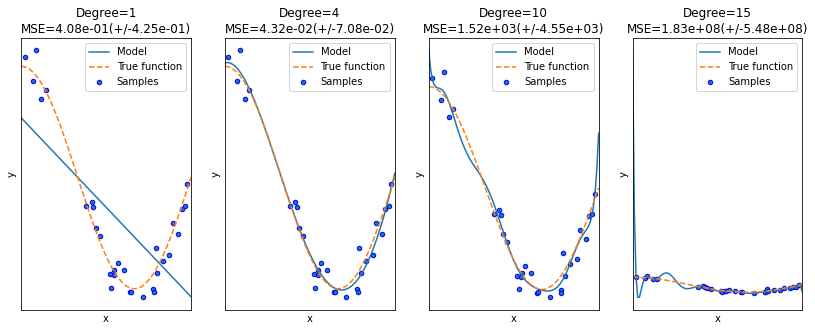

In [ ]:
# 다항식 차수를 변화시키며 예측결과 평가 점수 비교
# cross_val_score(), MSE

from sklearn.model_selection import cross_val_score

plt.figure(figsize=(14,5))
degrees = [1,4,10,15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("Polynomial_features", polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print(f'Degree={degrees[i]} coef : {np.round(coefficients,2)}')
    print(f'Degree={degrees[i]} MSE : {-1*np.mean(scores)}\n')

    # 0~1의 값을 균등하게 100으로 나눠 test 세트 만들기
    X_test = np.linspace(0,1,100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')

    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X,y,edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.legend(loc='best')
    plt.title('Degree={}\nMSE={:.2e}(+/-{:.2e})'.format(degrees[i],-scores.mean(),scores.std()))
plt.show()

### MSE는 Degree가 커질수록 감소하는것 같아 보이나 Degree가 지나치게 커지면 train 데이터에 Overfitting되어 오히려 MSE가 증가함

## 3. 편향-분산 Trade off
- degree=1 모델은 단순하나 한 방향성으로 치우친 경향: High Bias
- degree=15 모델은 복잡하여 변동이 큼: High Variance
- 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음(Trade-off 관계)
  - 편향이 높으면 분산은 낮아짐(과소적합)
  - 분산은 높으면 편향은 낮아짐(과대적합)
- 편향과 분산이 트레이드 오프를 이루며, 오류 Cost값이 최대로 낮아지는 모델을 구축하는것이 효율적인 머신러닝 예측모델을 만드는 방법

# 6. 규제선형모델(Regularized Linear Regression)
- 회귀 모델은 데이터에 적합하면서도 회귀 계수가 많아지는것을 제어해야함
- 기존 선형 회귀모델은 RSS만 최소화함. 이로 인해 train 데이터에 과적합 되는 문제 발생
- 규제선형모델: RSS를 최소화 + 회귀계수도 커지지 않도록 하는 방법
- 규제(Regulation): 회귀 계수값의 크기를 조절하여 과적합을 개선하는 방식
- Cost Function = Min(RSS + alpha*(회귀계수합))
  - alpha : 회귀계수에 대한 패널티 개념
  - alpha 값 올릴시 회귀계수합이 적어지므로 과적합 개선효과
  - alpha 값 내릴시 회귀계수의 합이 커져도 상쇄가 되므로 학습데이터 적합도가 높아짐
- 종류: Ridge, Lasso, Elastic net(Ridge+Lasso)
  - Lasso : L1규제. 회귀계수의 절대값에 대해 패널티 부과
  - Ridge : L2규제. 회귀계수의 제곱에 대해 패널티를 부과
  - Elastic net : Lasso, Ridge를 결합

## 1. Ridge Regression

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
X_data = bostonDF.iloc[:,:-1]
y_target = bostonDF.iloc[:,-1]

In [ ]:
# Ridge Regression(alpha=10)으로 CV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Ridge 객체 만들기
ridge = Ridge(alpha=10)

# CV
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 Folds의 개별 Negative MSE Scores : {np.round(neg_mse_scores,3)}')
print(f'5 Folds의 개별 RMSE scores : {np.round(rmse_scores,3)}')
print(f'5 Folds의 평균 RMSE : {avg_rmse:.3f}')

### 규제가 없는 Linear Regression의 mean RMSE = 5.829 < Ridge Regression = 5.518 로 예측 성능이 개선됨

5 Folds의 개별 Negative MSE Scores : [-11.422 -24.294 -28.144 -74.599 -28.517]
5 Folds의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 Folds의 평균 RMSE : 5.518


In [ ]:
# alpha의 변화에 따른 Ridge Regression의 평균 RMSE 값, 회귀계수값 변화
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha={alpha}, 5 Folds의 평균 RMSE : {avg_rmse:.3f}')
### alpha의 규제에 따라 평균 RMSE가 높아짐

alpha=0, 5 Folds의 평균 RMSE : 5.829
alpha=0.1, 5 Folds의 평균 RMSE : 5.788
alpha=1, 5 Folds의 평균 RMSE : 5.653
alpha=10, 5 Folds의 평균 RMSE : 5.518
alpha=100, 5 Folds의 평균 RMSE : 5.330


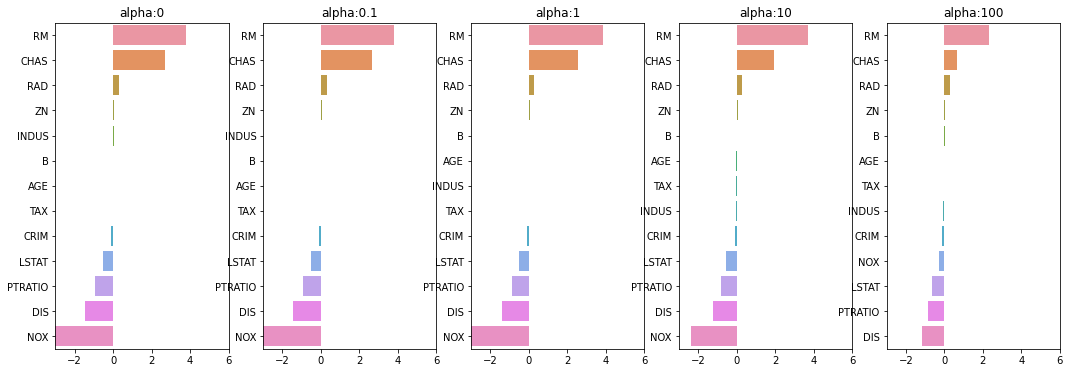

In [ ]:
# alpha값의 변화에 따른 피쳐의 회귀 계수값을 막대 그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

alphas = [0, 0.1, 1, 10, 100]
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피쳐별로 회귀계수를 Series로 변환, 이를 df의 칼럼으로 추가
    coeff = pd.Series(ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha의 값에서 회귀 계수를 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

### alpha 값을 계속 증가시킬수록 회귀계수 값은 지속적으로 작아짐

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 2. Lasso Regression
- W의 절대값에 패널티를 부과하는 L1규제를 선형회귀에 적용
- L2규제가 회귀계수의 크기를 감소시키는데 반해, L1규제는 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거
- L1규제는 적절한 feature만 회귀에 포함시키며 feature 선택에 유용함

In [ ]:
# alpha값의 변화에 따른 Lasso Regression의 RMSE

from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbos=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbos: print('#####', model_name, '#####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha={param}, 5 Folds의 평균 RMSE : {avg_rmse:.3f}')

        # cross_val_score는 evaluation metric만 반환하므로 회귀계수 추출시 모델 학습이 필요함
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=[0.07, 0.1, 0.5, 1, 3], X_data_n=X_data, y_target_n=y_target)
coeff_lasso_df.sort_values(by='alpha:'+str(lasso_alphas[0]), ascending=False)

##### Lasso #####
alpha=0.07, 5 Folds의 평균 RMSE : 5.612
alpha=0.1, 5 Folds의 평균 RMSE : 5.615
alpha=0.5, 5 Folds의 평균 RMSE : 5.669
alpha=1, 5 Folds의 평균 RMSE : 5.776
alpha=3, 5 Folds의 평균 RMSE : 6.189


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## 3. ElasticNet Regression
- Lasso Regression의 L1규제는 중요 feature만을 선택하고 다른 feature는 제거하여 alpha값에 따라 회귀계수의 값이 급격히 변동 할 수 있음
- ElasticNet: Lasso Regression의 단점을 완화하기 위해 Ridge Regression의 L2규제를 추가함. 수행시간이 상대적으로 오래 걸림

In [ ]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)
coeff_elastic_df.sort_values(by='alpha:'+str(elastic_alphas[0]), ascending=False)
### Lasso Regression에 비해 회귀계수가 0인 feature들이 줄었음

##### ElasticNet #####
alpha=0.07, 5 Folds의 평균 RMSE : 5.542
alpha=0.1, 5 Folds의 평균 RMSE : 5.526
alpha=0.5, 5 Folds의 평균 RMSE : 5.467
alpha=1, 5 Folds의 평균 RMSE : 5.597
alpha=3, 5 Folds의 평균 RMSE : 6.068


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 4. 선형회귀모델을 위한 데이터변환
- 규제선형모델을 이용해 최적의 하이퍼 파라미터를 찾아내는것 못지않게 데이터 분포도의 정규화와 인코딩 방법도 중요함
- 선형회귀모델의 전제조건
  - feature, target 간 선형의 관계가 있다고 가정
  - feature, target은 정규분포의 형태. 특히 target이 정규분포가 아닐시(Skewed) 예측 성능에 부정적인 영향 미칠 가능성이 높음
- 선형회귀모델을 만들기 전 데이터가 전제조건을 만족하지 않을 수 있으므로 스케일링/정규화 작업을 수행해야
  1. StandardScaler(표준화, 표준정규분포로 스케일링), MinMaxScaler(정규화, 0~1값으로 스케일링). 예측성능 향상을 크게 기대하기 어려움
  2. 다항변환: 스케일링/정규화를 수행했음에도 예측 성능에 향상이 없을 경우, 데이터 세트에 다시 다항특성을 적용하기도. 과적합 이슈 발생 가능성
  3. log변환. 1, 2번보다 많이 쓰이며 주로 target값 변환에 쓰임

In [ ]:
# 데이터변환 함수 만들기
# StandardScaler, MinMaxScaler, Log Transformation, Polynomial

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환하기
# 원본, 표준정규분포, 표준정규분포+다항식, 최대최소정규화, 최대최소정규화+다항식, 로그변환
scale_methods =[(None, None),('Standard', None), ('Standard',2), ('MinMax', None), ('MinMax',2), ('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print(f'\n변환유형:{scale_method[0]}, Polynomial Degree:{scale_method[1]}')
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbos=False, return_coeff=False)

### StandardScaling, MinMaxScaling만으로 feature 데이터 세트 변경해도 성능상 개선은 없음
### StandardScaling/MinMaxScaling + 2차 다항식 변환 + Ridge alpha값에 따라 성능 개선이 일부 있음
### Log Transformation은 대부분 성능 개선이 좋은편임. 데이터 변환시 사용 권장


변환유형:None, Polynomial Degree:None
alpha=0.1, 5 Folds의 평균 RMSE : 5.788
alpha=1, 5 Folds의 평균 RMSE : 5.653
alpha=10, 5 Folds의 평균 RMSE : 5.518
alpha=100, 5 Folds의 평균 RMSE : 5.330

변환유형:Standard, Polynomial Degree:None
alpha=0.1, 5 Folds의 평균 RMSE : 5.826
alpha=1, 5 Folds의 평균 RMSE : 5.803
alpha=10, 5 Folds의 평균 RMSE : 5.637
alpha=100, 5 Folds의 평균 RMSE : 5.421

변환유형:Standard, Polynomial Degree:2
alpha=0.1, 5 Folds의 평균 RMSE : 8.827
alpha=1, 5 Folds의 평균 RMSE : 6.871
alpha=10, 5 Folds의 평균 RMSE : 5.485
alpha=100, 5 Folds의 평균 RMSE : 4.634

변환유형:MinMax, Polynomial Degree:None
alpha=0.1, 5 Folds의 평균 RMSE : 5.764
alpha=1, 5 Folds의 평균 RMSE : 5.465
alpha=10, 5 Folds의 평균 RMSE : 5.754
alpha=100, 5 Folds의 평균 RMSE : 7.635

변환유형:MinMax, Polynomial Degree:2
alpha=0.1, 5 Folds의 평균 RMSE : 5.298
alpha=1, 5 Folds의 평균 RMSE : 4.323
alpha=10, 5 Folds의 평균 RMSE : 5.185
alpha=100, 5 Folds의 평균 RMSE : 6.538

변환유형:Log, Polynomial Degree:None
alpha=0.1, 5 Folds의 평균 RMSE : 4.770
alpha=1, 5 Folds의 평균 RMSE : 4.676
alpha=10, 

# 7. Logistic Regression
- 선형회귀를 분류에 적용한 알고리즘
- 학습을 통해 시그모이드(Sigmoid) 함수의 최적선을 찾고 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정함
- 선형회귀와는 달리 선형함수가 아닌 시그모이드 함수를 사용하는점이 로지스틱회귀의 특징임
- 시그모이드 함수: S자 커브의 형태. X값이 커지면 1에 근사, 작아지면 0에 근사. 선형함수가 분류하지 못하는 부분을 분류 가능

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()
print(cancer.keys())

# StandardScaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# train, test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

# Logistic Regression으로 학습,예측,평가
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
print(f'Accuracy : {accuracy:.3f}, ROC AUC : {roc_auc:.3f}')

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Accuracy : 0.977, ROC AUC : 0.972


In [ ]:
# Parameters of Logistic Regression: penalty(=Regulation), C(=1/alpha)
# GridSearchCV로 하이퍼 피라미터 최적화

from sklearn.model_selection import GridSearchCV
params = {'penalty':['l2', 'l1'], 'C':[0.01,0.1,1,5,10]}
grid_clf = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'Best parameters : {grid_clf.best_params_}\nBest score : {grid_clf.best_score_:.3f}')

Best parameters : {'C': 1, 'penalty': 'l2'}
Best score : 0.975


# 8. Regression Tree
- 회귀함수를 기반으로 하지 않고 트리를 기반으로 하는 회귀 방식. 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 함
- 분류트리와 크게 다르지 않으나 리프노드에서 예측 결정값을 만드는 과정에 차이가 있음\
분류트리가 특정 클래스 레이블을 결정하는 것과는 달리, 회귀트리는 리프노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산함
- 트리기반의 알고리즘은 분류뿐만 아니라 회귀도 가능함. 트리생성은 CART(Classification And Regression Tree) 알고리즘에 기반하고 있음
- 회귀트리의 특징: 선형회귀와 다른방식이라 coef가 없으나 feature_importances_로 feature별 중요도 파악 가능

In [ ]:
# 보스턴 주택 가격 예측, 평가
# RandomForestRegressor 이용
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

X_data = bostonDF.drop(['PRICE'], axis=1)
y_target = bostonDF.iloc[:,-1]

rf = RandomForestRegressor()
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 Folds CV의 개별 Negative MSE Scores : {np.round(neg_mse_scores,3)}')
print(f'5 Folds CV의 개별 RMSE Scores : {np.round(rmse_scores,3)}')
print(f'5 Folds CV의 평균 RMSE : {np.round(avg_rmse,3)}')

5 Folds CV의 개별 Negative MSE Scores : [ -8.17  -13.282 -19.631 -44.93  -19.519]
5 Folds CV의 개별 RMSE Scores : [2.858 3.645 4.431 6.703 4.418]
5 Folds CV의 평균 RMSE : 4.411


In [ ]:
# DecisionTree, RandomForest, GBM, XGBoost, LightGBM Regressor 이용하여 예측, 평가
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# CV 평가함수 만들기
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rsme_scores = np.sqrt(-1*neg_mse_scores)
    ave_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__,'#####')
    print(f'5 Folds CV의 평균 RMSE : {np.round(avg_rmse,3)}')

# 회귀트리 객체 생성후 예측, 평가
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
lgb = LGBMRegressor()
models = [dt, rf, gb, xgb, lgb]

for i in models:
    get_model_cv_prediction(i, X_data, y_target)

##### DecisionTreeRegressor #####
5 Folds CV의 평균 RMSE : 4.251
##### RandomForestRegressor #####
5 Folds CV의 평균 RMSE : 4.251
##### GradientBoostingRegressor #####
5 Folds CV의 평균 RMSE : 4.251
##### XGBRegressor #####
5 Folds CV의 평균 RMSE : 4.251
##### LGBMRegressor #####
5 Folds CV의 평균 RMSE : 4.251


<AxesSubplot:>

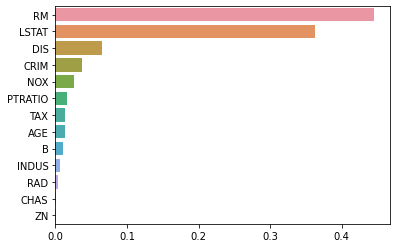

In [ ]:
# feature importance를 이용해 feature별 중요도 시각화
import seaborn as sns
%matplotlib inline 

rf = RandomForestRegressor()
rf.fit(X_data, y_target)
feature_series = pd.Series(rf.feature_importances_, index=X_data.columns)
feature_series.sort_values(ascending=False, inplace=True)
sns.barplot(feature_series, feature_series.index)

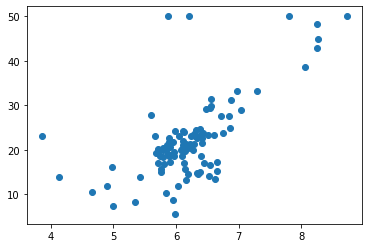

In [ ]:
# LinearRegression VS RegressionTree
# RegressionTree의 max_depth 크기를 변화시키며 회귀트리 예측선 변화
import matplotlib.pyplot as plt

# 샘플 100개 추출후 산점도 그리기
bostonDF_sample = bostonDF[['RM', 'PRICE']].sample(n=100, random_state=0)
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# LinearRegression, RegressionTree 객체 생성
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)
estimator = [lr_reg, dt_reg2, dt_reg7]

# X_test 세트(n=100) 직접 만들기(예측 확인용)
X_test = np.arange(4.5,8.5, 0.04).reshape(-1,1)

# X, y 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습, 예측
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

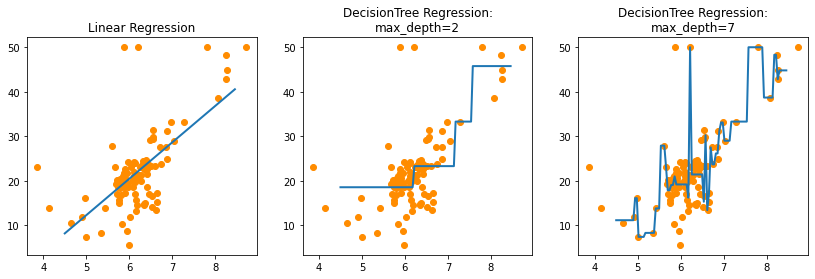

In [ ]:
# Regression Tree의 예측 회귀선 시각화

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('DecisionTree Regression:\nmax_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_dt2, label='max_depth:2', linewidth=2)

ax3.set_title('DecisionTree Regression:\nmax_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_dt7, label='max_depth:7', linewidth=2)

### max_depth=7의 경우 train 데이터의 이상치 세트도 학습하며 복잡한 계단 형태의 회귀선을 만듦(과적합)

# 9. 실습: 자전거 대여 수요 예측
- 회귀트리
- 종속변수 정규성 개선 위한 로그 변환
- 평가지표 : RMSKE, RMSE, MAE
- 'year', 'month', 'day', 'hour'등의 피쳐들을 OneHotEncoding후 회귀모델의 예측 성능 비교
- 회귀트리를 이용해 회귀예측모델 및 평가(RMSLE, RMSE, MAE)

## 1. 데이터 클렌징 및 가공

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

bike_df = pd.read_csv('C:/workspace/cakd3/수업/dataset/kaggle/train.csv')
display(bike_df.shape, bike_df.head(3), bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


(10886, 12)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


None

In [ ]:
# datetime을 datetime 타입으로 변경
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

# datetime에서 년,월,일,시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [ ]:
# 열 삭제
bike_df.drop(['datetime','registered','casual'],axis=1, inplace=True)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [ ]:
# RMSLE, RSME, MSE 구하는 함수 만들기
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print(f'RMSLE : {rmsle_val:.3f}, RMSE : {rmse_val:.3f}, MAE : {mae_val:.3f}')

## 2. 로그변환, 피쳐인코딩, 모델 학습/예측/평가

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


<AxesSubplot:>

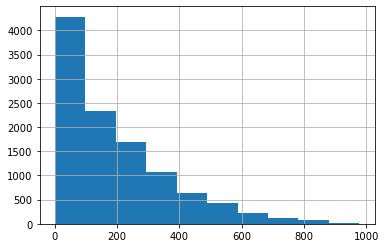

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_features = bike_df.drop(['count'], axis=1)
y_target = bike_df['count']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test, pred)

### target의 실제값에 비해 예측 오류값이 꽤 큰 편 -> target의 분포가 왜곡된 형태는 아닐지? 확인해야
y_target.hist()

<AxesSubplot:>

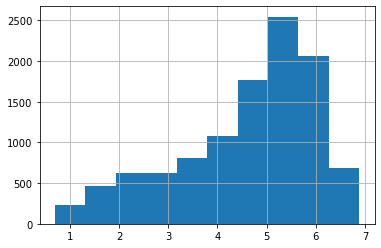

In [ ]:
# target을 로그변환
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

### 정규분포는 아니나 왜곡 정도가 많이 향상됨

In [ ]:
# 로그변환하여 학습/평가/예측

X_train, X_test, y_train, y_test = train_test_split(X_features, np.log1p(y_target), test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# test의 target값은 로그변환 되었으므로 원래 스케일로 다시 변환
y_test_exp = np.expm1(y_test)

# 예측값도 로그 변환된 타깃 기반으로 학습되어 예측되었으므로 원래 스케일로 다시 변환
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

### 로그변환으로 RMSLE는 감소했으나 RMSE는 오름. 이유는?

RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


<AxesSubplot:>

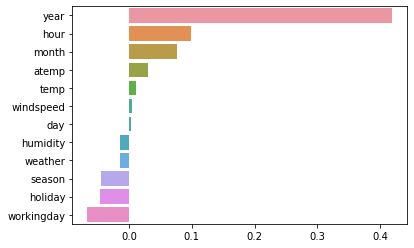

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(coef_sort, coef_sort.index)

# year feature의 coef가 가장 높음
# OneHotEncoding 적용하여 변환해야

In [ ]:
# One Hot Encoding 적용하여 학습/예측/평가

X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday','season'])

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, np.log1p(y_target), test_size=0.3, random_state=0)

# model별 pred 함수만들기
def get_model_predict(model,X_train,X_test,y_train,y_test, is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### OneHotEncoding 적용하니 예측성능 많이 향상됨

### LinearRegression ###
RMSLE : 0.594, RMSE : 98.476, MAE : 63.952
### Ridge ###
RMSLE : 0.595, RMSE : 99.353, MAE : 64.520
### Lasso ###
RMSLE : 0.638, RMSE : 113.429, MAE : 72.892


<AxesSubplot:>

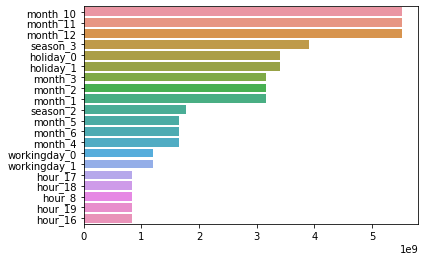

In [ ]:
# feature별 회귀계수 시각화

coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef = coef.sort_values(ascending=False)[:20]
sns.barplot(coef, coef.index)

### feature를 어떻게 인코딩 하는지에 따라 예측 성능에 큰 영향을 미칠 수 있음

In [ ]:
# 회귀트리로 예측하기

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### 선형회귀모델모다 회귀 예측성능이 개선?!!!

### RandomForestRegressor ###
RMSLE : 0.354, RMSE : 50.361, MAE : 31.117
### GradientBoostingRegressor ###
RMSLE : 0.342, RMSE : 57.604, MAE : 35.262
### XGBRegressor ###
RMSLE : 0.341, RMSE : 50.200, MAE : 30.970
### LGBMRegressor ###
RMSLE : 0.316, RMSE : 46.446, MAE : 28.667


# 10. 실습: 보스턴 주택가격
- LinearRegression, Ridge, Lasso를 이용하여 모델링 및 평가
  - 평가는 RMSLE(가격이 비싼 주택일수록 예측 결과 오류가 전체 오류에 미치는 비중이 높은 것을 상쇄하기 위하여 오류 값을 로그 변환하여 평가)
  - Null이 많은 컬럼과 불필요한 컬럼 삭제
  - 삭제하지 않은 숫자형 컬럼은 평균값으로 대체
  - 문자형 피처는 원-핫인코딩으로 변환
  - 피처별 회귀 계수 시각화 및 모델별 비교
  - 교차검증 수행 후 모델별 비교 - cross_val_score 이용
  - 각 모델별 평가 결과 비교 분석 및 개선 방안 기술
- Ridge와 Lasso 모델에 대하여 하이퍼 파라미터 튜닝하면서 최적 값 도출 후 학습/예측/평가 수행 및 회귀 계수 시각화
- 피처 데이터 세트의 분포도 검토 후 로그 변환 및 종속변수와 상관관계가 높은 독립변수의 이상치를 제거 후 학습/예측/평가 수행 및 시각화
- 회귀 트리 모델을 이용해 학습/예측/평가 수행 및 피처 중요도 시각화

미국 아이오와 주의 에임스 지방의 주택가격 정보\
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df = pd.read_csv('C:/workspace/cakd3/수업/dataset/kaggle/train_boston.csv')
house_df.head(3)
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature type\n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series>0].sort_values(ascending=False))
house_df_org = house_df.copy()

데이터 세트의 Shape: (1460, 81)

전체 feature type
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


<AxesSubplot:title={'center':'Original Sale Price'}, xlabel='SalePrice', ylabel='Density'>

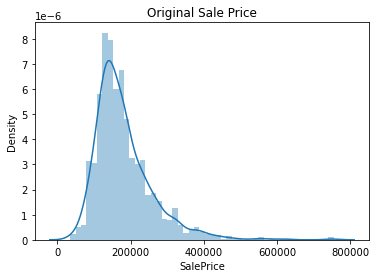

In [ ]:
# target이 정규분포인지 확인
plt.title('Original Sale Price')
sns.distplot(house_df['SalePrice'])

### 오른쪽으로 꼬리가 긴 왜곡된 형태의 분포. 로그변환 필요

<AxesSubplot:title={'center':'Log-Transformed Sale Price'}, xlabel='SalePrice', ylabel='Density'>

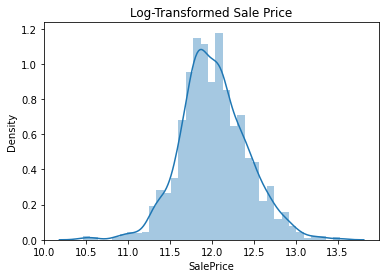

In [ ]:
plt.title('Log-Transformed Sale Price')
sns.distplot(np.log1p(house_df['SalePrice']))

### 정규분포^^

In [ ]:
# Null값이 지나치게 많은 열, Id 열 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# 삭제하지 않은 숫자형 열 중 Null값은 평균으로 대체
house_df.fillna(house_df.mean(), inplace=True)

# target 로그변환
house_df['SalePrice'] = np.log1p(house_df.SalePrice)

In [ ]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature type\n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series>0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 75)

전체 feature type
 object     38
int64      33
float64     4
dtype: int64

Null 칼럼과 그 건수:
 GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64


In [ ]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)
null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print(f'Type of Null Features : {house_df_ohe.dtypes[null_column_count.index]}')
house_df_ohe.head()

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
Type of Null Features : Series([], dtype: object)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## 2. 선형회귀모델 학습/예측/평가

In [ ]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMLSE : ', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, 학습/예측/평가
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models)

### Lasso Regression이 비교적 회귀 성능이 떨어짐. 하이퍼파라미터 튜닝 필요

LinearRegression RMLSE :  0.132
Ridge RMLSE :  0.128
Lasso RMLSE :  0.176


[0.13189576579153972, 0.12750846334053154, 0.17628250556471395]

In [ ]:
# 상,하위 10위인 coef 뽑는 함수 생성
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

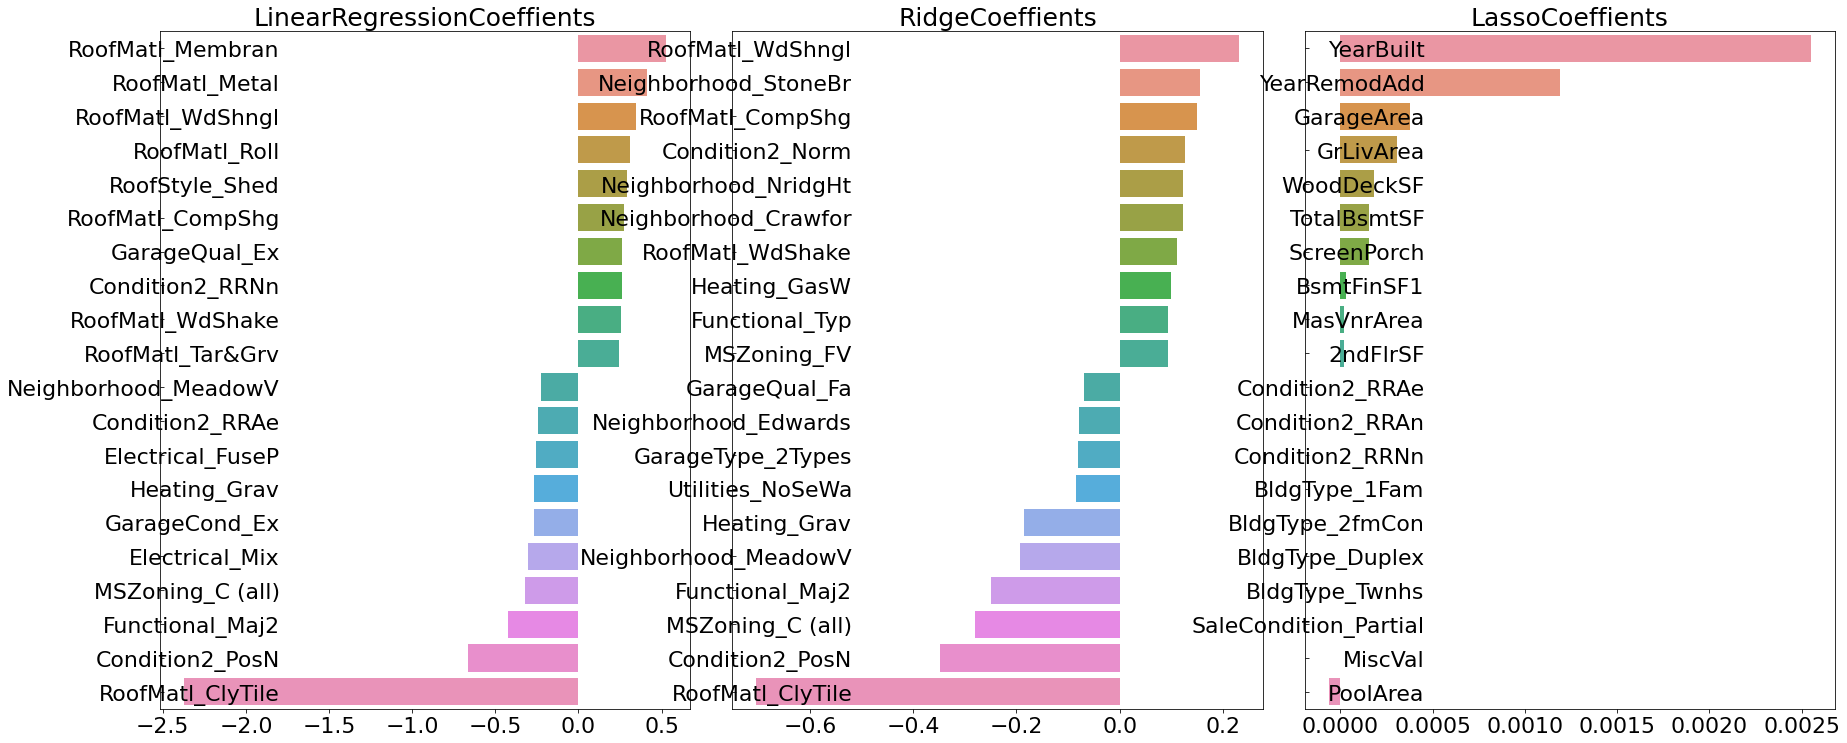

In [ ]:
# 상, 하위 10위인 coef 시각화 함수 생성
def visulize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()

    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        axs[i_num].set_title(model.__class__.__name__+'Coeffients', size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

# lr, ridge, lasso
models = [lr, ridge, lasso]
visulize_coefficient(models)

### lr, ridge는 coef가 유사한 형태로 분포
### Lasso는 회귀계수가 전반적으로 작은편

In [ ]:
# CV
from sklearn.model_selection import cross_val_score
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,\
            scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} CV RMSE : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} CV 평균 RMSE : {np.round(rmse_avg,3)}\n')

models = [lr, ridge, lasso]
get_avg_rmse_cv(models)

### CV를 해도 Lasso는 성능이 떨어짐

LinearRegression CV RMSE : [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE : 0.155

Ridge CV RMSE : [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE : 0.144

Lasso CV RMSE : [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE : 0.198



In [ ]:
# GridSearchCV
# Hyper Parameter 찾기

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 CV시 최적 평균 RMSE : {np.round(rmse,4)}, 최적 alpha : {grid_model.best_params_}')
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_params)

Ridge 5 CV시 최적 평균 RMSE : 0.1418, 최적 alpha : {'alpha': 12}
Lasso 5 CV시 최적 평균 RMSE : 0.142, 최적 alpha : {'alpha': 0.001}


LinearRegression RMLSE :  0.132
Ridge RMLSE :  0.124
Lasso RMLSE :  0.12


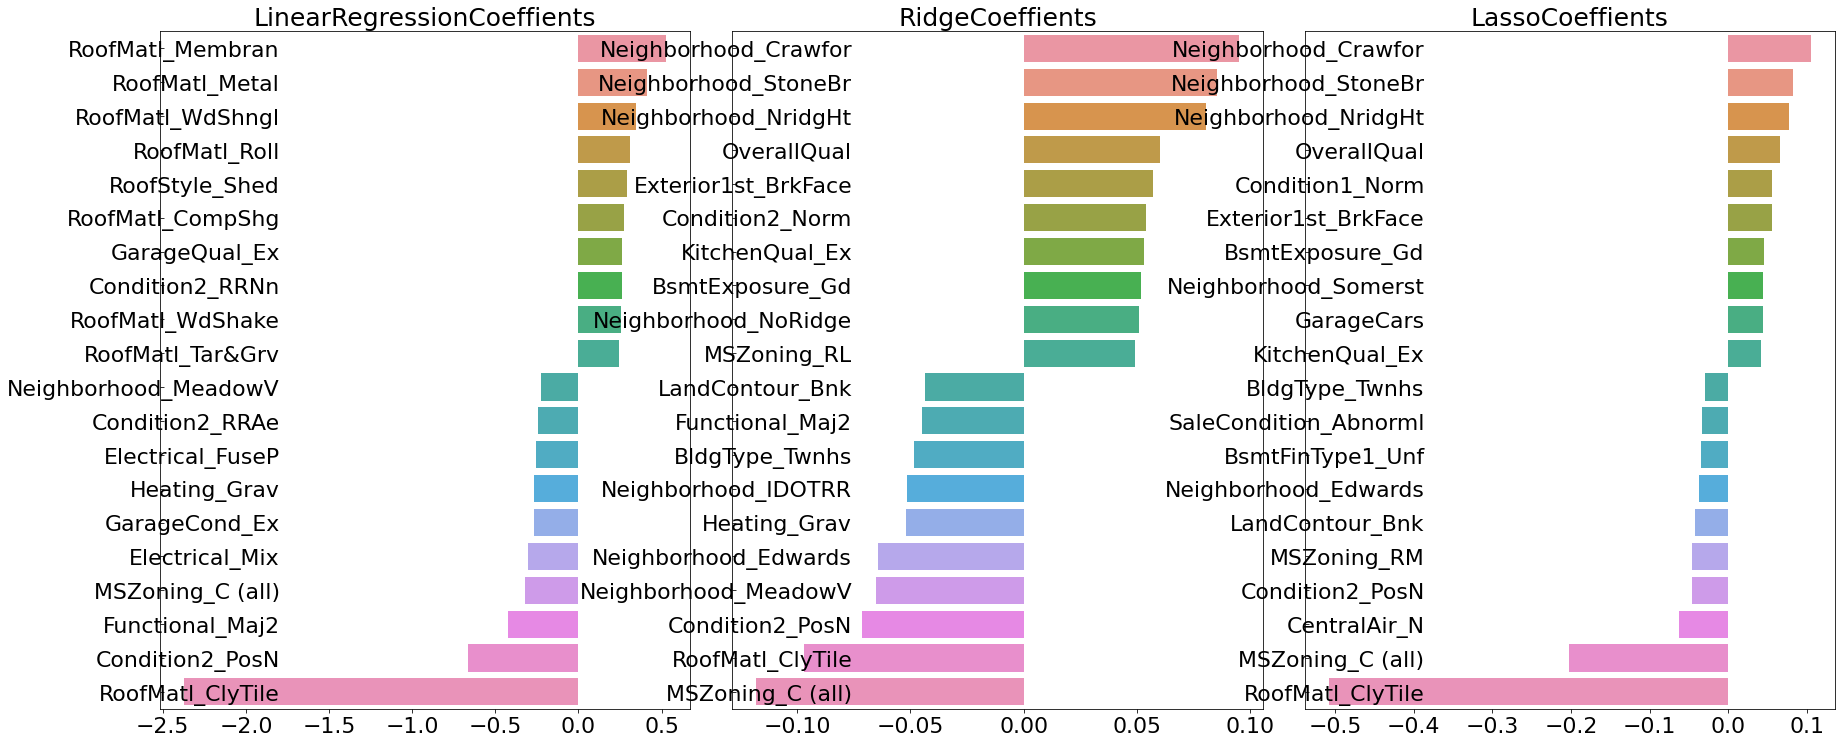

In [ ]:
# Hyper Parameter 적용하여 학습/예측/평가
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha=12)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# RMSE
models = [lr,ridge,lasso]
get_rmses(models)

# coef 시각화
visulize_coefficient(models)

### Hyper Parameter 최적화 후 데이터 세트의 예측 성능이 더 좋아짐
### 회귀계수도 모델별로 비슷한 양상. Lasso는 Ridge에 비해 같은 feature라도 회귀계수가 작은 경향

In [ ]:
# 데이터세트를 추가적으로 가공하여 모델튜닝
# features의 skew확인 후 1 이상일시 log변환

from scipy.stats import skew

features_index = house_df.dtypes[house_df.dtypes != 'object'].index
skew_features = house_df[features_index].apply(lambda x:skew(x))
skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])
house_df[skew_features_top.index].describe()

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.818794,4.217092,9.110966,2.145749,4.229731,0.655398,6.750560,7.008452,0.099814,7.268512,0.039486,0.711673,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456
std,0.688354,0.314733,0.517369,2.630626,2.992052,1.845045,1.145712,0.317431,0.747354,0.333303,0.162599,0.089268,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030
min,3.044522,3.091042,7.170888,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.929898,0.000000,0.000000,0.000000,6.680541,6.783325,0.000000,7.030415,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.931826,4.263383,9.156887,0.000000,5.951943,0.000000,6.900227,6.992096,0.000000,7.289611,0.000000,0.693147,0.000000,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.262680,4.382027,9.358976,5.107456,6.569832,0.000000,7.169542,7.238676,0.000000,7.483104,0.000000,0.693147,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.252273,5.749393,12.279537,7.378384,8.638525,7.296413,8.717846,8.453827,6.350886,8.638171,1.098612,1.386294,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660


Ridge 5 CV시 최적 평균 RMSE : 0.1275, 최적 alpha : {'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE : 0.1252, 최적 alpha : {'alpha': 0.001}


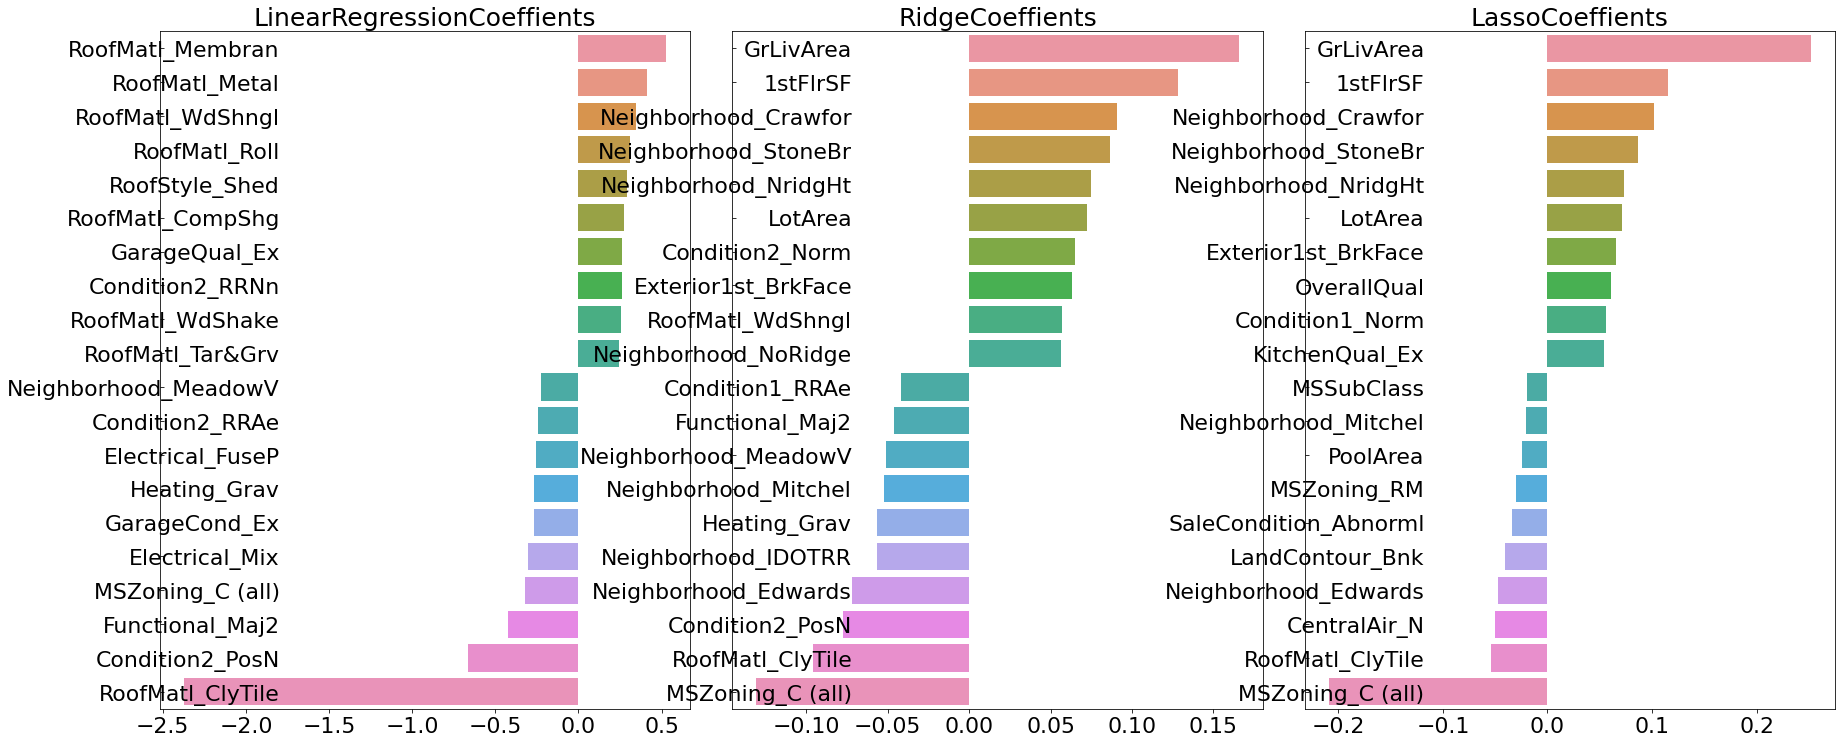

In [ ]:
# OneHotEncoding
house_df_ohe = pd.get_dummies(house_df)

# X, y, train test split
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# GridSearchCV로 Hyper Parameter 찾기
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_params)

# coef 시각화
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

models = [lr,ridge,lasso]
visulize_coefficient(models)

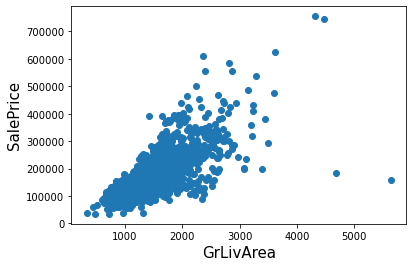

In [ ]:
# 데이터세트를 추가적으로 가공하여 모델튜닝
# 이상치 데이터 처리
# coef가 높은 GrLivArea feature의 산점도 확인

plt.scatter(house_df_org['GrLivArea'], house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

### outlier 2개 확인. 삭제

In [ ]:
# GrLivArea outlier 삭제
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index
print(f'이상치 삭제 전 house_df_ohe shape : {house_df_ohe.shape}')
house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print(f'이상치 삭제 후 house_df_ohe shape : {house_df_ohe.shape}')

이상치 삭제 전 house_df_ohe shape : (1460, 271)
이상치 삭제 후 house_df_ohe shape : (1458, 271)


In [ ]:
# 이상치 제거 후 모델 피팅 재실시
# X, y, train test split
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# GridSearchCV로 Hyper Parameter 찾기
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_params)

### 예측 수치 크게 향상

Ridge 5 CV시 최적 평균 RMSE : 0.1125, 최적 alpha : {'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE : 0.1122, 최적 alpha : {'alpha': 0.001}


LinearRegression RMLSE :  0.129
Ridge RMLSE :  0.103
Lasso RMLSE :  0.1


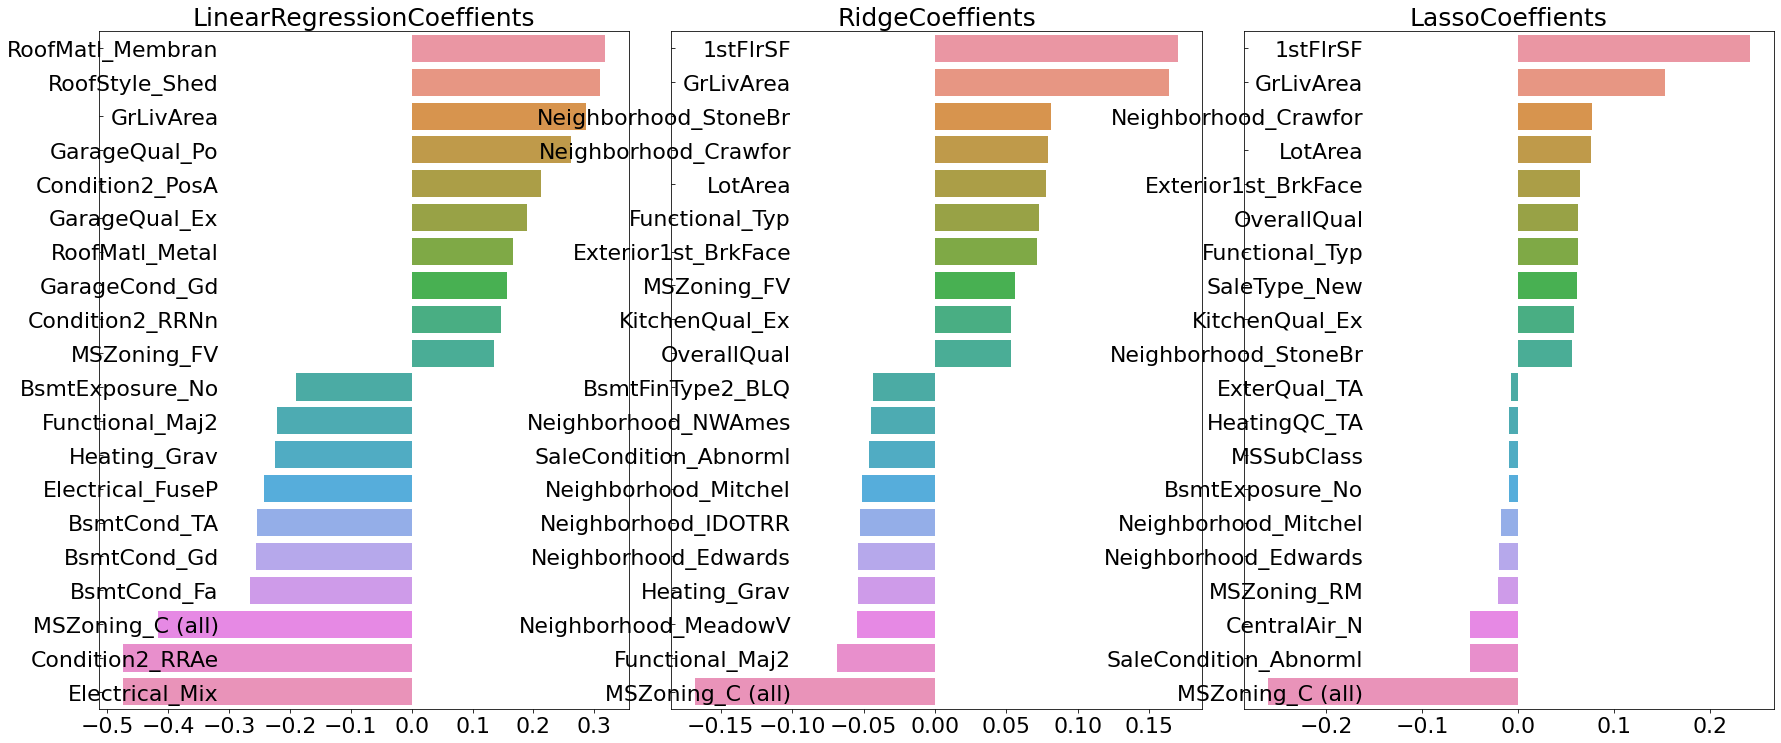

In [ ]:
# Hyper Parameter 적용하여 학습/예측/평가
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# RMSE
models = [lr,ridge,lasso]
get_rmses(models)

# coef 시각화
visulize_coefficient(models)

### GrLivArea의 coef 순위가 내려감

## 3. 회귀트리모델 학습/예측/평가

In [ ]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV시 최적 평균 RMSE : 0.1178, 최적 alpha : {'n_estimators': 1000}


In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6,colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV시 최적 평균 RMSE : 0.1163, 최적 alpha : {'n_estimators': 1000}


## 4. 회귀모델의 예측결과 혼합을 통한 최종예측

In [ ]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print(f'{key} 모델의 RMSE : {rmse}')

# 개별 모델의 학습/예측
ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종혼합':pred, 'Ridge':ridge_pred, 'Lasso':lasso_pred}
get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.10007930884470516
Ridge 모델의 RMSE : 0.10345177546603264
Lasso 모델의 RMSE : 0.10024170460890032


In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6,colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합':pred, 'XGBM':xgb_pred, 'LGBM':lgbm_pred}
get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.10170077353447762
XGBM 모델의 RMSE : 0.10738295638346222
LGBM 모델의 RMSE : 0.10382510019327311
